# Pytorch workflow 1st one
### Resources
* https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

In [1]:
import torch
import numpy as np
from torch import nn ##Building blocks of neural networks that are in pytorch
import matplotlib.pyplot as plt

### Rough idea of the workflow
### 1.data(prepare and load)
### 2.Building the model
### 3.Fitting the model to data(training)
### 4.making predictions and evaluting a model (inference)
### 5.Saving and loading a model
### 6.put it altogether

#### Data can be anything in machine learning
#### steps to ml:
#### 1.Get data into numerical reperesentation
#### 2.Build a model to learn patterns in that numerical representation

#### Regression model


In [2]:
#Creating known parameters
weight = 0.7
bias = 0.6
#Creating data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)#adds an extra dimension to the tensor i,e [] brackets
y = weight * X + bias 
print("Tensor X:",X[:10])
print("Vector y:",y[:10])


Tensor X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
Vector y: tensor([[0.6000],
        [0.6140],
        [0.6280],
        [0.6420],
        [0.6560],
        [0.6700],
        [0.6840],
        [0.6980],
        [0.7120],
        [0.7260]])


In [3]:
len(X),len(y)

(50, 50)

## Splitting data into train and test
#### one of the most important concepts in machine learning

In [4]:
#Doing the train and test split
train_split = int(0.8*len(X))#since both of the tensors have the same length or dimension we do not need to split them using two differnt split varibales
X_train ,y_train = X[:train_split],y[:train_split]
X_test ,y_test = X[train_split:] , y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

# Visualzing the dataset


In [5]:
def plot_pred(train_data = X_train,train_lables = y_train,test_data = X_test,test_labels = y_test,predictions=None):
    plt.figure(figsize=(10,7))
    #plot training data in blue
    plt.scatter(train_data,train_lables,c = "b",s=4,label="Training data")
    #plot Test data in red
    plt.scatter(test_data,test_labels,c = "r",s = 4,label = "Testing data")
    if predictions is not None:
        plt.scatter(test_data,predictions,c = "g",s =4,label = "Predcitions")
    #Show the legend
    plt.legend(fontsize = 14)
# ...existing code...

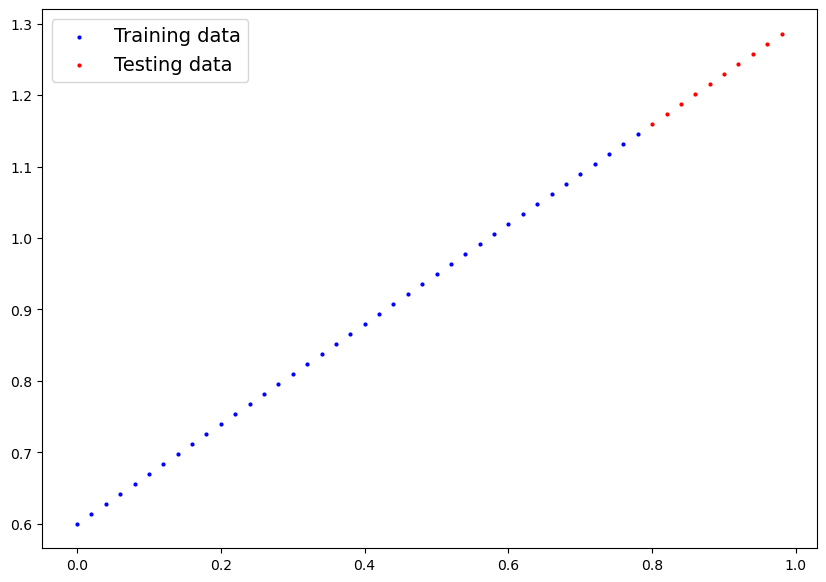

In [6]:
plot_pred();

### Building the model
#### Building linear regression model
* Resources : https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html
#### How the model works
* Start with random values(weights & biases)
* Look at training data and readjust the random values to better represent the ideal values
#### How does it do this?
#### Through two main algorithms
#### 1. Gradient descent (finds the minima of the funtion i.e it minimizes the cost function)
#### 2. Backpropogation

In [7]:
class linear_regression(nn.Module):
    def __init__(self):
        super().__init__()
        # use singular name to match forward()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias   = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

# Pytorch model building essentials
* torch.nn - contains all of the building for computationall graphs (a neural ntetwork is considered as a computational graph)
* torch.nn.parameter - what parameters should our model try and learn 
A pytorch layer from torch.nn will set this for us  
* torch.nn.module - The base class for all neural network modules , if you sublcass it you should overwrite forward() 
* torch.optim - This is where the optimizers in Pytorch are,they help with the gradient descent
* def forward() - All nn.module subclasses require you to overwrite forward() , this method defines what happens in the forward computation

# Checking the contents of out pytorch model 
Now we have created a model let's see what is inside
So we can check our model parameters or what is inside our model using .parameters()

In [8]:
torch.manual_seed(42)
torch.randn(1)  

tensor([0.3367])

In [9]:
# create a random seed
torch.manual_seed(42)
#create an instance of the model (this is a subclass of nn.module)
model_0 = linear_regression() 
#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
weight,bias

(0.7, 0.6)

making predcitions using torch.inference_mode() 
when we test out model it is going to run on the forward function

In [12]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[1.1600],
         [1.1740],
         [1.1880],
         [1.2020],
         [1.2160],
         [1.2300],
         [1.2440],
         [1.2580],
         [1.2720],
         [1.2860]]))

In [13]:
# turns off gradient tracking
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
# shows gradient tracking 
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

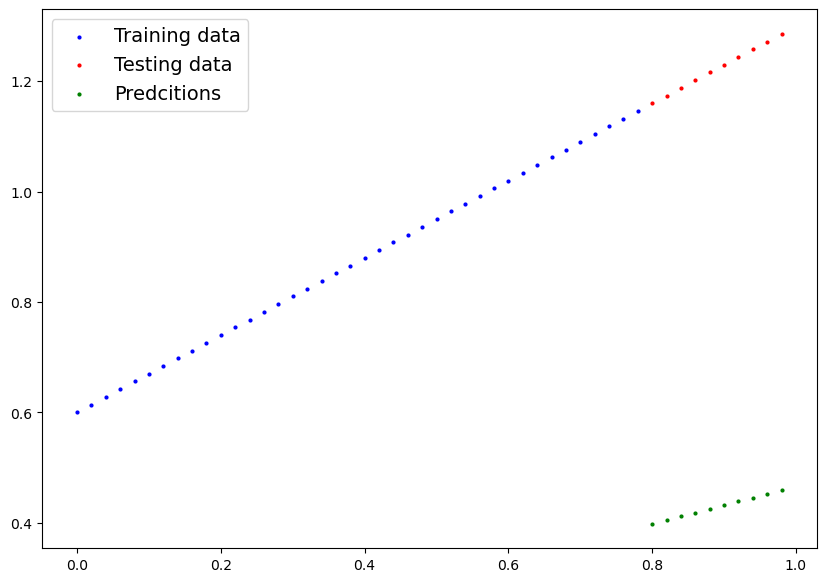

In [15]:

plot_pred(predictions=y_preds.detach())

### Traininng a model means taking it from known to unknown parameters or from poor representation(of data) to better representation of data 

#### to measure the peroformance of the model we use loss function (or criterion or cost function)

* Things we need to train a model:
* **Loss function** A function to measuure the performence of the model.
* **Optimizer** A function to update the wieghts of the model.

In [16]:
#setup a loss function
loss_fn = nn.L1Loss()
#setup optimizer(stohchastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)#lr=Learning rate most important

### Building a trainig and a testing loop in pytorch
A couple of things we need in training loop:
* Loop thorugh the data
* Forward pass
* Loss calculation
* Backward pass(Move backward through the network to calculate the gradiens of each of the parameters of our model with respect ot the loss)
* Optimize the model (Optimizer adjusts the parameters of the model based on the gradients calculated in the backward pass)

hyperparameters are the parameters that are set by the developer for example learning rate, number of epochs etc.

In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)

epochs = 10
#Loop through the data          
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train()

    #forward pass   
    y_pred = model_0(X_train)
    #calculate the loss
    loss = loss_fn(y_pred,y_train)
    print(f"Losss : {loss}")
    #optimizer zero grad
    optimizer.zero_grad()

    #Perform back propogation on the loss with respect to the parameters of the model
    loss.backward()
    #Step the optimizer peform gradient descent
    optimizer.step()
    ### Testing 
    model_0.eval() #Turns off gradient tracking and diffrenet settings that are not needed for evaluation and testing(dropout/batch norms)
    with torch.inferecene_mode():
        #1. do the forward pass
        test_pred = model_0(X_test)
        #2.Calcualte the loss
        test_loss = loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
        print(f"Epoch :{epoch}|")
    #Print out model state_dict()
    print(model_0.state_dict())

Losss : 0.6128813028335571
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Losss : 0.6013603210449219
OrderedDict([('weight', tensor([0.3445])), ('bias', tensor([0.1488]))])
Losss : 0.5898393988609314
OrderedDict([('weight', tensor([0.3484])), ('bias', tensor([0.1588]))])
Losss : 0.5783182978630066
OrderedDict([('weight', tensor([0.3523])), ('bias', tensor([0.1688]))])
Losss : 0.5667973160743713
OrderedDict([('weight', tensor([0.3562])), ('bias', tensor([0.1788]))])
Losss : 0.5552763342857361
OrderedDict([('weight', tensor([0.3601])), ('bias', tensor([0.1888]))])
Losss : 0.5437554121017456
OrderedDict([('weight', tensor([0.3640])), ('bias', tensor([0.1988]))])
Losss : 0.5322343707084656
OrderedDict([('weight', tensor([0.3679])), ('bias', tensor([0.2088]))])
Losss : 0.5207133293151855
OrderedDict([('weight', tensor([0.3718])), ('bias', tensor([0.2188]))])
Losss : 0.5091923475265503
OrderedDict([('weight', tensor([0.3757])), ('bias', tensor([0.2288]))])


In [19]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3757])), ('bias', tensor([0.2288]))])

In [20]:
weight,bias

(0.7, 0.6)

#### Before optimization

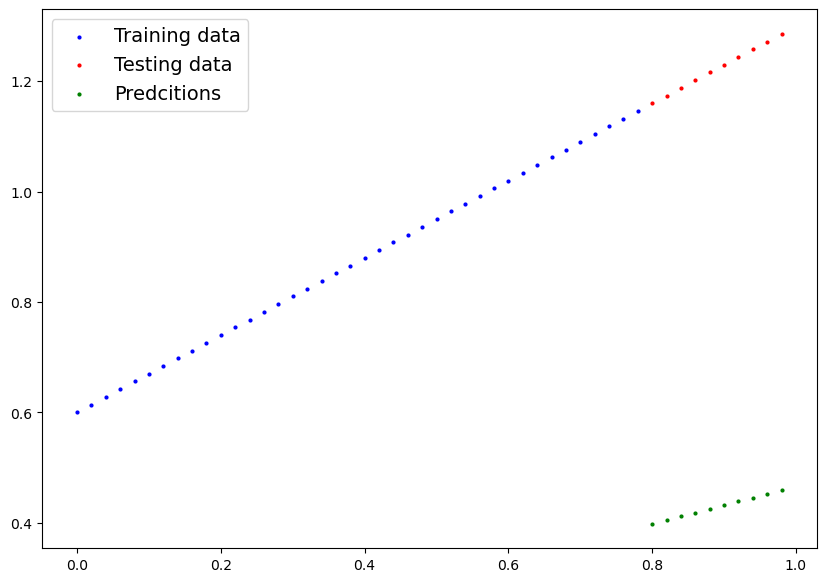

In [21]:
plot_pred(predictions=y_preds.detach())

## After optimization
#### Making predictions with the newly optimized model

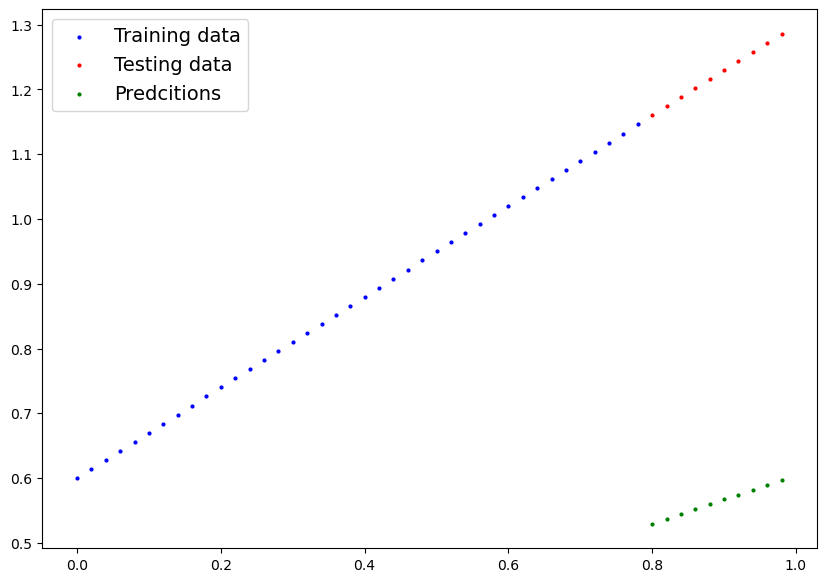

In [22]:
model_0.eval()
with torch.inference_mode():
    y_pred_new = model_0(X_test)
plot_pred(predictions=y_pred_new)